# Avanzando en el concepto de optimización

**Autor:** Jazna Meza Hidalgo

**Correo Electrónico:** ja.meza@profesor.duoc.cl

**Fecha de Creación:** Septiembre de 2022  
**Versión:** 1.0  

**Fecha de Actualización:** Febrero de 2025  
**Versión:** 2.0  

---

## Descripción

En este notebook se profundiza un poco más en el concepto de los optimizadores.

---

## Requisitos de Software

Este notebook fue desarrollado con Python 3.9. A continuación se listan las bibliotecas necesarias:

- numpy (1.26.4)
- matplotlib (3.7.1)

Para verificar la versión instalada ejecutar usando el nombre del paquete del cual quieres saber la versión; por ejemplo, si quieres saber la versión de sklearn usas:

```bash
import numpy
print(numpy.__version__)
````

#Funcionamiento de optimizadores

La siguiente imagen muestra las diferencias en el funcionamiento de los distintos optimizadores.

![Optimizadores](https://miro.medium.com/v2/resize:fit:1240/0*-Vu1u-0JFiKYkpOa)

In [12]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np

from typing import Callable

$f(x)=cos(x)*e^{x/100} - \frac{10}{e^{-0.01*x}}$

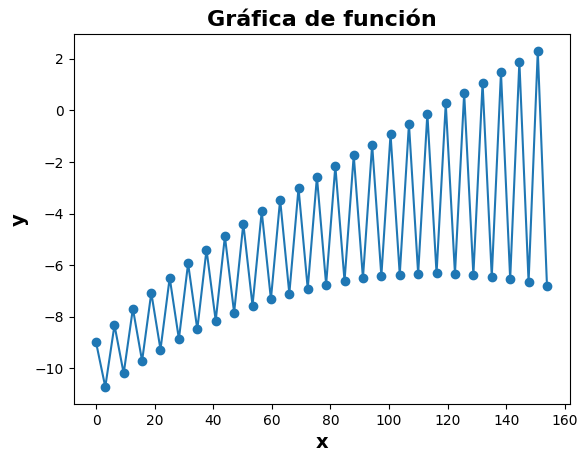

In [2]:
n = 50
x = np.arange(n) *np.pi
y = np.cos(x) * np.exp(x/100) - 10*np.exp(-0.01*x)

plt.figure()
plt.plot(x, y, 'o-')
plt.title("Gráfica de función", fontsize=16, fontweight="bold")
plt.xlabel("x", fontsize=14, fontweight="bold")
plt.ylabel("y", fontsize=14, fontweight="bold")
plt.show()

In [3]:
y

array([ -9.        , -10.72263888,  -8.3261659 , -10.19940439,
        -7.685213  ,  -9.71644878,  -7.07461009,  -9.27186479,
        -6.49194581,  -8.86389671,  -5.93491914,  -8.4909334 ,
        -5.4013303 ,  -8.15150198,  -4.88907207,  -7.84426199,
        -4.39612148,  -7.56800009,  -3.92053178,  -7.32162529,
        -3.46042482,  -7.10416462,  -3.01398357,  -6.9147593 ,
        -2.57944496,  -6.75266133,  -2.15509294,  -6.61723057,
        -1.73925168,  -6.50793219,  -1.33027898,  -6.42433454,
        -0.92655973,  -6.3661075 ,  -0.5264996 ,  -6.33302112,
        -0.12851869,  -6.32494472,   0.26895468,  -6.34184642,
         0.66749019,  -6.38379296,   1.06866172,  -6.45095001,
         1.47405353,  -6.54358276,   1.8852666 ,  -6.66205704,
         2.30392485,  -6.80684072])

**Exponential Weighted average**

El **Promedio ponderado exponencial (EWA)** también conocido como **Media Móvil Exponencial (EMA)** es una técnica utilziada en redes neuronales y optimización para suarizar datos y mejorar la estabilidad de los cálculos.

Se usa principalmente en algoritmos de optimización como **Momemtum**, **RMSProp** y **Adam** para mejorar la convergencia del modelo.

Es un método para calcular un promedio de valores pasados, pero asignando más peso a los valores recientes y menos a los valores más antiguos. Su fórmula es:

$V_t=\beta V_{t-1} + (1-\beta)θ_t$

donde:

+ $V_t$ es el valor suavizado en el tiempo *t* (nuevo promedio ponderado).
+ $\beta$ es el factor suavizado (0 < $\beta$ < 1) qu controla cuánto peso se le asigna a los valores antiguos.
+ $V_{t-1}$ es el promedio ponderado del paso anterior.
+ $θ_{t}$ es el nuevo dato observado en el tiempo *t* (como una nueva actualziación del gradiente o una métrica).

Este promedio suaviza la variabilidad de los datos y ayuda a reducir fluctuaciones bruscas en los valores.

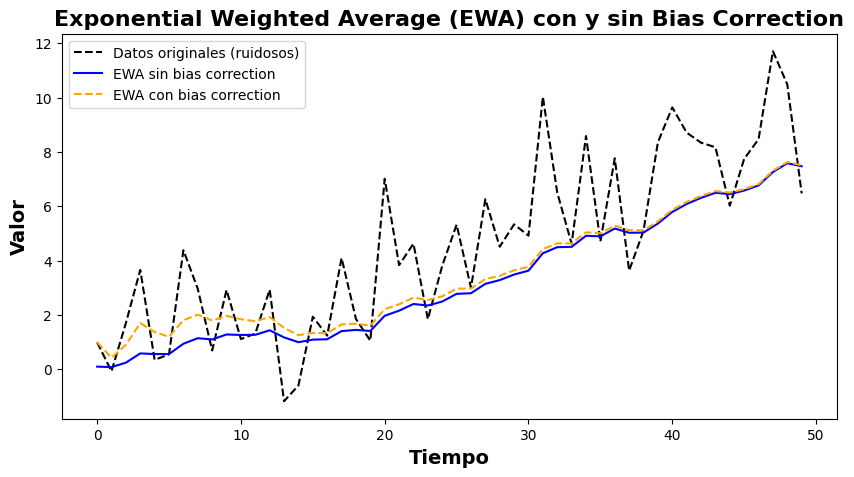

In [9]:
# Generar datos simulados con ruido
np.random.seed(42)
n = 50
data = np.linspace(0, 10, n) + np.random.randn(n) * 2

# Parámetro de suavizado
beta = 0.9

# Función para calcular EWA sin bias correction
def ewa(values, beta):
    avg = 0
    ewa_values = []
    for v in values:
        avg = beta * avg + (1 - beta) * v
        ewa_values.append(avg)
    return np.array(ewa_values)

# Función para calcular EWA con bias correction
def ewa_bias_correction(values, beta):
    avg = 0
    ewa_values = []
    t = 0  # Contador de iteraciones
    for v in values:
        t += 1
        avg = beta * avg + (1 - beta) * v
        bias_correction = avg / (1 - beta**t)  # Aplicar corrección de sesgo
        ewa_values.append(bias_correction)
    return np.array(ewa_values)

# Calcular EWA con y sin bias correction
ewa_values = ewa(data, beta)
ewa_bias_values = ewa_bias_correction(data, beta)

# Graficar
plt.figure(figsize=(10, 5))
plt.plot(data, 'k--', label='Datos originales (ruidosos)')
plt.plot(ewa_values, 'b-', label='EWA sin bias correction')
plt.plot(ewa_bias_values, 'orange', linestyle='dashed', label='EWA con bias correction')
plt.legend()
plt.xlabel('Tiempo', fontsize=14, fontweight="bold")
plt.ylabel('Valor', fontsize=14, fontweight="bold")
plt.title('Exponential Weighted Average (EWA) con y sin Bias Correction', fontsize=16, fontweight="bold")
plt.show()


---
**Comentarios**

---
+ Aplica la corrección de sesgo con $\frac{1}{1-\beta^t}$
+ Valores originales (ruidosos) (línea punteada): representan la señal sin suavizar.
+ EWA sin corrección de bias (línea azul): suaviza la señal, pero en los primeros valores está sesgado al valor inicial.
+ EWA con corrección de bias (línea discontinua naranja): corrige el sesgo inicial ajustando la normalización.





# Identificando la importancia del valor de $\beta$

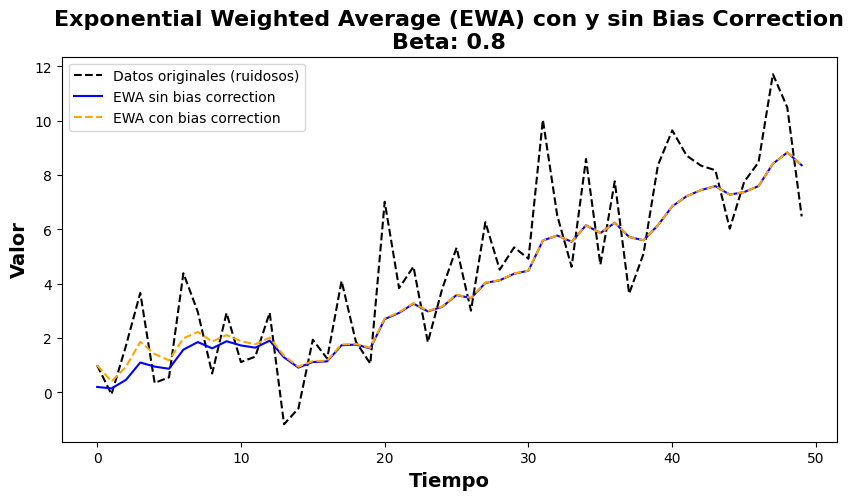

In [10]:
beta = 0.8
# Calcular EWA con y sin bias correction
ewa_values = ewa(data, beta)
ewa_bias_values = ewa_bias_correction(data, beta)

# Graficar
plt.figure(figsize=(10, 5))
plt.plot(data, 'k--', label='Datos originales (ruidosos)')
plt.plot(ewa_values, 'b-', label='EWA sin bias correction')
plt.plot(ewa_bias_values, 'orange', linestyle='dashed', label='EWA con bias correction')
plt.legend()
plt.xlabel('Tiempo', fontsize=14, fontweight="bold")
plt.ylabel('Valor', fontsize=14, fontweight="bold")
plt.title(f'Exponential Weighted Average (EWA) con y sin Bias Correction\nBeta: {beta}', fontsize=16, fontweight="bold")
plt.show()


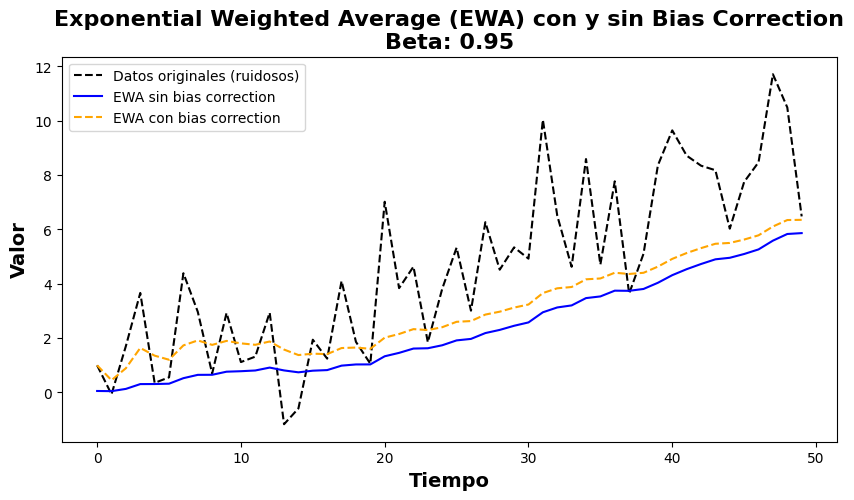

In [11]:
beta = 0.95
# Calcular EWA con y sin bias correction
ewa_values = ewa(data, beta)
ewa_bias_values = ewa_bias_correction(data, beta)

# Graficar
plt.figure(figsize=(10, 5))
plt.plot(data, 'k--', label='Datos originales (ruidosos)')
plt.plot(ewa_values, 'b-', label='EWA sin bias correction')
plt.plot(ewa_bias_values, 'orange', linestyle='dashed', label='EWA con bias correction')
plt.legend()
plt.xlabel('Tiempo', fontsize=14, fontweight="bold")
plt.ylabel('Valor', fontsize=14, fontweight="bold")
plt.title(f'Exponential Weighted Average (EWA) con y sin Bias Correction\nBeta: {beta}', fontsize=16, fontweight="bold")
plt.show()

# Aplicación de EWA

In [13]:
def ewa(y : np.array, beta: float):   # Exponential Weighted average
  n = len(y)
  zs = np.zeros(n)
  z = 0

  for i in range(n):
    z = beta*z + (1-beta)*y[i]
    zs[i] = z

  return zs


In [14]:
def ewabc(y: np.array, beta: float): # Exponential Weighted average with Bias correction
  n = len(y)
  zs = np.zeros(n)
  z = 0

  for i in range(n):
    z = beta*z + (1-beta)*y[i]
    zc = z/(1 - beta**(i+1))
    zs[i] = zc
  return zs

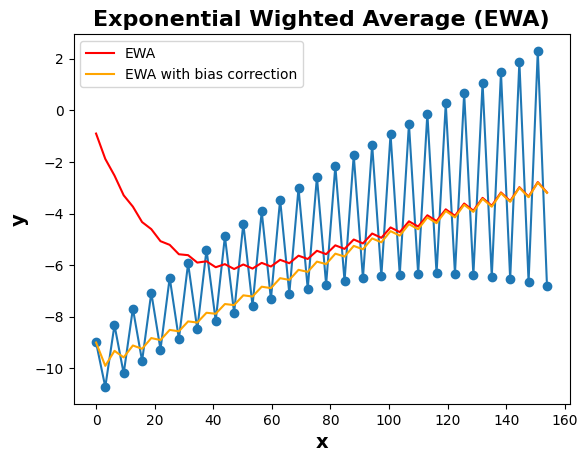

In [15]:
beta = 0.9

plt.figure()
plt.plot(x, y, 'o-')
plt.plot(x, ewa(y, beta), c='red', label='EWA')
plt.plot(x, ewabc(y, beta), c='orange', label='EWA with bias correction')
plt.title("Exponential Wighted Average (EWA)", fontsize=16, fontweight="bold")
plt.xlabel("x", fontsize=14, fontweight="bold")
plt.ylabel("y", fontsize=14, fontweight="bold")
plt.legend()
pass


**Función a optimizar**

$f(x)=x^2$

In [16]:
def f(x: float):  # Funcion a optimizar
  return x**2

def grad(x: float):   # Gradiente de la funcion
  return 2*x

def gd(x: float, grad: Callable[[float], float], alpha: float, max_iter=10):     # Gradiente descendente
  xs = np.zeros(1 + max_iter)
  xs[0] = x
  for i in range(max_iter):
    x = x - alpha*grad(x)    # x - learning rate * gradiente de x
    xs[i+1] = x

  return xs

def gd_momentum(x: float, grad: Callable[[float], float], alpha: float, beta=0.9, max_iter=10):    # Gradiente con momentum
  xs = np.zeros(1 + max_iter)
  xs[0] = x

  v=0

  for i in range(max_iter):
    v = beta*v + (1-beta)*grad(x)
    vc = v/(1 + beta**(i+1)) #--> incluye bias correction
    x = x - alpha*vc
    xs[i+1] = x
  return xs

## Notas

$\textit{El gradiente con momentum}$ recuerda el incremento aplicado a las variables en cada iteración y determina la siguiente actualización como una combinación lineal entre el gradiente y el incremento anterior. Es decir, aplica a los incrementos cierta "inercia" de forma que varíen más lentamente.

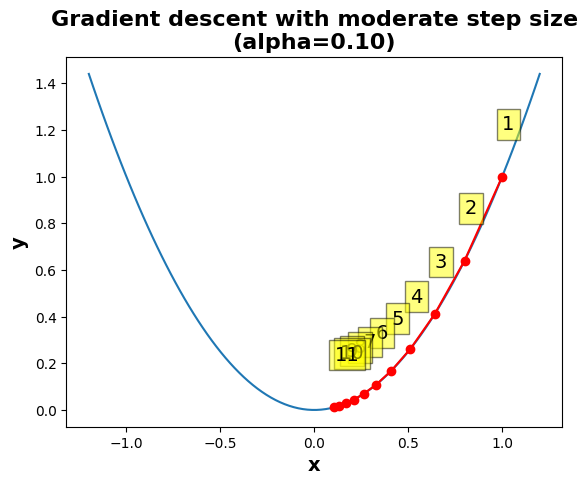

In [17]:
# Gradient descent with moderate step size
alpha = 0.1
x0 = 1
xs = gd(x0, grad, alpha)

xp = np.linspace(-1.2, 1.2, 100)
plt.plot(xp, f(xp))
plt.plot(xs, f(xs), 'o-', c='red')
plt.title("Gradient descent with moderate step size\n(alpha={:.2f})".format(alpha), fontsize=16, fontweight="bold")
plt.xlabel("x", fontsize=14, fontweight="bold")
plt.ylabel("y", fontsize=14, fontweight="bold")
for i, (x,y) in enumerate(zip(xs, f(xs)), 1):
  plt.text(x, y+0.2, i, bbox=dict(facecolor='yellow', alpha=0.5), fontsize=14)
pass

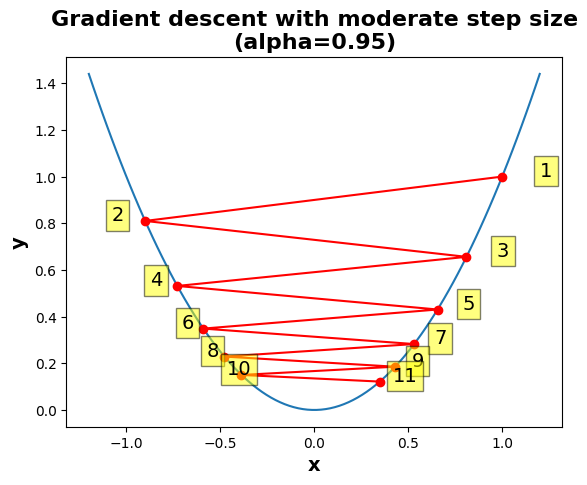

In [18]:
# Gradient descent with large step size
alpha = 0.95
x0 = 1
xs = gd(x0, grad, alpha)

xp = np.linspace(-1.2, 1.2, 100)
plt.plot(xp, f(xp))
plt.plot(xs, f(xs), 'o-', c='red')
plt.title("Gradient descent with moderate step size\n(alpha={:.2f})".format(alpha), fontsize=16, fontweight="bold")
plt.xlabel("x", fontsize=14, fontweight="bold")
plt.ylabel("y", fontsize=14, fontweight="bold")
for i, (x,y) in enumerate(zip(xs, f(xs)), 1):
  plt.text(x*1.2, y, i, bbox=dict(facecolor='yellow', alpha=0.5), fontsize=14)
pass

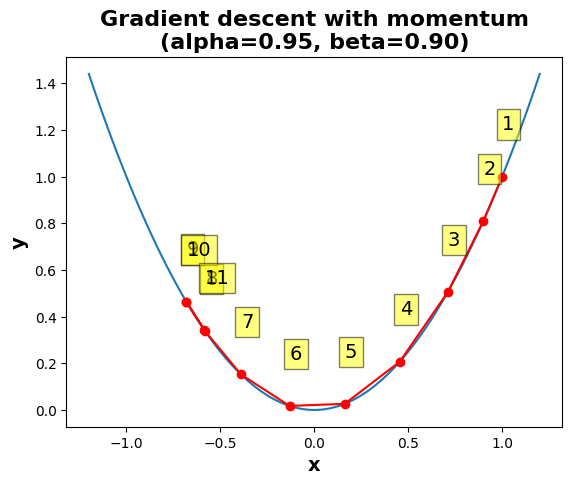

In [19]:
# Gradient descent with momentum
alpha = 0.95
x0 = 1
xbeta = 0.9
xs = gd_momentum(x0, grad, alpha, beta=xbeta)

xp = np.linspace(-1.2, 1.2, 100)
plt.plot(xp, f(xp))
plt.plot(xs, f(xs), 'o-', c='red')
plt.title("Gradient descent with momentum\n(alpha={0:.2f}, beta={1:.2f})".format(alpha, xbeta), fontsize=16, fontweight="bold")
plt.xlabel("x", fontsize=14, fontweight="bold")
plt.ylabel("y", fontsize=14, fontweight="bold")
for i, (x,y) in enumerate(zip(xs, f(xs)), 1):
  plt.text(x, y+0.2, i, bbox=dict(facecolor='yellow', alpha=0.5), fontsize=14)
pass

# Momentum + RMSProp

$\textit{RMSProp o Root Mean Square Propagation}$ es una variación de AdaGrad en la que, en lugar de mantener un acumulado de los gradientes, se utiliza el concepto de "ventana" para considerar solo los gradientes más recientes.

$\textit{AdaGrad (Adaptative Gradient Algorithm o Algoritmo de Gradiente Adaptativo)}$ es una modificación de Stochastic Gradient Descent en la que se utilizan diferentes tasas de aprendizaje para las variables teniendo en cuenta gradiente acumulado en cada una de ellas. Un problema de este optimizador es que, en ocasiones, puede ocurrir que la tasa de aprendizaje para una variable decrezca demasiado rápidamente debido a la acumulación de altos valores del gradiente al comienzo del entrenamiento, lo que puede llevar a que el aprendiz no sea capaz de aproximarse al mínimo en dicha dimensión.



**Función a optimizar**

$f(x, y)=x^2+100y^2$

In [20]:
# Función a optimizar
def f2(x: float):
  return x[0]**2 + 100*x[1]**2

def grad2(x: float):
  return np.array([2*x[0], 200*x[1]])


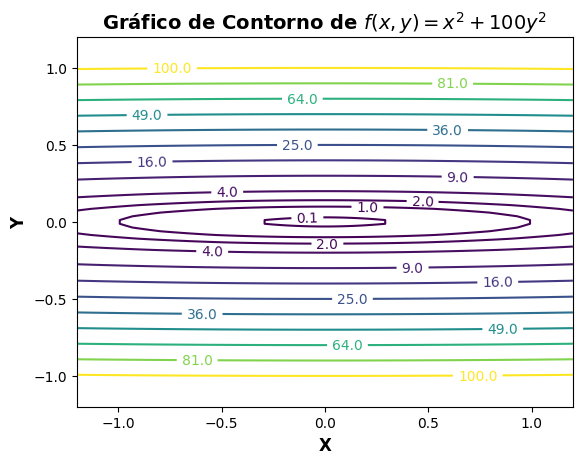

In [25]:
x = np.linspace(-1.2, 1.2, 100)
y = np.linspace(-1.2, 1.2, 100)
X,Y = np.meshgrid(x, y)
levels=[0.1, 1, 2, 4, 9, 16, 25, 36, 49, 64, 81, 100]
Z = X**2 + 100*Y**2
c = plt.contour(X, Y, Z, levels)
plt.clabel(c, inline=True, fontsize=10)  # Agregar etiquetas con los valores de nivel
plt.xlabel("X", fontsize=12, fontweight="bold")
plt.ylabel("Y", fontsize=12, fontweight="bold")
plt.title("Gráfico de Contorno de $f(x,y) = x^2 + 100y^2$", fontsize=14, fontweight="bold")
plt.show()
pass

---
**Comentarios de la forma de las curvas**

---
+ Las curvas de nivel representan valores constantes de *f*, lo que significa que todos los puntos en una misma curva tienen el mismo valor de *f*.
+ Dado que $f(x, y)=x^2+100y^2$ implica que la forma de las curvas será **elíptica** ya que el coeficiente 100 en $y^2$ hace que la función crezca mucho más rápido en la dirección de **Y** que en la dirección de **X**.

---
**Comentarios de la concavidad**

---
+ La función es una **cuadrática convexa**, lo que significa que los valores de *f* aumentan a medida que nos alejamos del origen (0,0).
+ La pendiente en la dirección **Y** es mucho más pronunciada que en la dirección **X** debido al coeficiente (100).

---
**Comentarios de la separación entre curvas**

---
+ Los niveles que se han definido manualmente están espaciados de forma creciente.
+ En las regiones donde las curvas están más juntas, la función cambia más rápidamente (hay un gradiente más fuerte).
+ En las regiones donde están más separadas, la función varía más lentamente,.


In [ ]:
def gd2(x: float, grad: Callable[[float], float], alpha: float, max_iter=10):
  xs = np.zeros((1+max_iter,x.shape[0]))
  xs[0,:] = x

  for i in range(max_iter):
    x = x - alpha*grad(x)
    xs[i+1,:] = x
  return xs

In [ ]:
def gd2_momentum(x: float, grad: Callable[[float], float], alpha: float, beta=0.9, max_iter=10):
  xs = np.zeros((1+max_iter, x.shape[0]))
  xs[0,:] = x

  v = 0

  for i in range(max_iter):
    v = beta*v + (1-beta)*grad(x)
    vc = v/(1 + beta**(i+1))
    x = x - alpha*vc
    xs[i+1,:] = x
  return xs

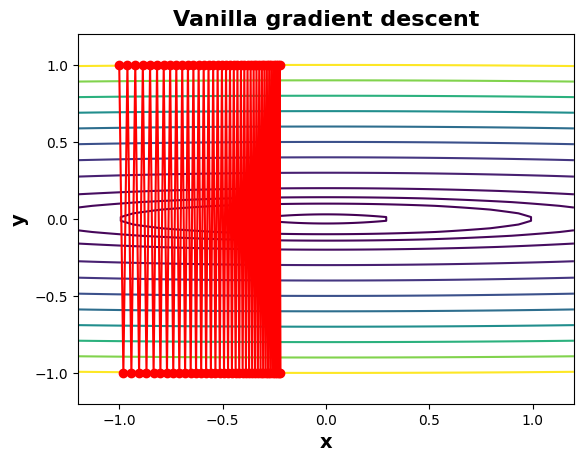

In [ ]:
# Gradient descent with large step size
alpha = 0.01
x0 = np.array([-1, 1])
xs = gd2(x0, grad2, alpha, max_iter=75)

x = np.linspace(-1.2, 1.2, 100)
y = np.linspace(-1.2, 1.2, 100)
X, Y = np.meshgrid(x, y)
levels=[0.1, 1, 2, 4, 9, 16, 25, 36, 49, 64, 81, 100]
Z = x**2 + 100*Y**2
c = plt.contour(X, Y, Z, levels)
plt.plot(xs[:,0],xs[:,1], 'o-', c='red')
plt.title('Vanilla gradient descent', fontsize=16, fontweight="bold")
plt.xlabel("x", fontsize=14, fontweight="bold")
plt.ylabel("y", fontsize=14, fontweight="bold")
pass

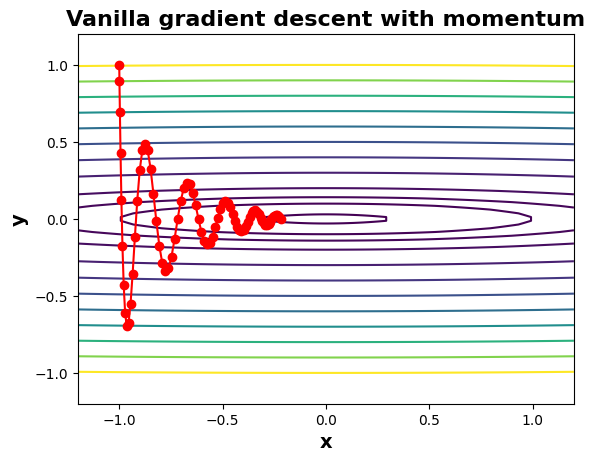

In [ ]:
# Gradient descent with momentum
alpha = 0.01
x0 = np.array([-1, 1])
xs = gd2_momentum(x0, grad2, alpha, beta=0.9, max_iter=75)

x = np.linspace(-1.2, 1.2, 100)
y = np.linspace(-1.2, 1.2, 100)
X, Y = np.meshgrid(x, y)
levels=[0.1, 1, 2, 4, 9, 16, 25, 36, 49, 64, 81, 100]
Z = x**2 + 100*Y**2
c = plt.contour(X, Y, Z, levels)
plt.plot(xs[:,0],xs[:,1], 'o-', c='red')
plt.title('Vanilla gradient descent with momentum', fontsize=16, fontweight="bold")
plt.xlabel("x", fontsize=14, fontweight="bold")
plt.ylabel("y", fontsize=14, fontweight="bold")
pass

In [ ]:
# RMSProp
def gd2_rmsprop(x: float, grad: Callable[[float], float], alpha: float, beta=0.9, eps=1e-8, max_iter=10):
  xs = np.zeros((1+max_iter, x.shape[0]))
  xs[0,:] = x
  v = 0

  for i in range(max_iter):
    v = beta*v + (1-beta)*grad(x)**2
    x = x - alpha*grad(x)/(eps + np.sqrt(v))
    xs[i+1,:] = x
  return xs

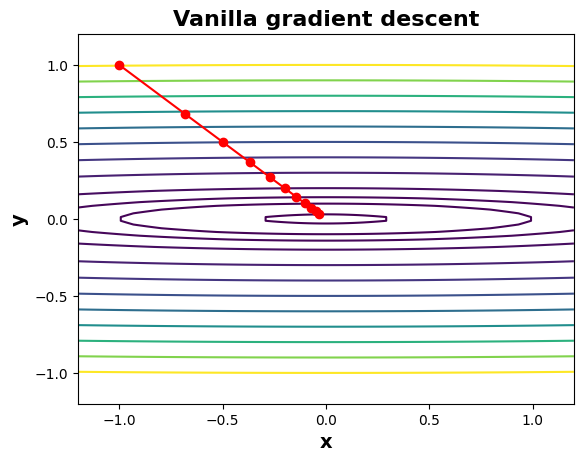

In [ ]:
alpha = 0.1
x0 = np.array([-1, 1])
xs = gd2_rmsprop(x0, grad2, alpha, beta=0.9, max_iter=10)

x = np.linspace(-1.2, 1.2, 100)
y = np.linspace(-1.2, 1.2, 100)
X, Y = np.meshgrid(x, y)
levels=[0.1, 1, 2, 4, 9, 16, 25, 36, 49, 64, 81, 100]
Z = x**2 + 100*Y**2
c = plt.contour(X, Y, Z, levels)
plt.plot(xs[:,0],xs[:,1], 'o-', c='red')
plt.title('Vanilla gradient descent', fontsize=16, fontweight="bold")
plt.xlabel("x", fontsize=14, fontweight="bold")
plt.ylabel("y", fontsize=14, fontweight="bold")
pass

# ADAM

$\textit{Adam o Adaptative Moment Optimization}$ combina la metodología de Momentum y RMSProp, calculando una combinación lineal entre el gradiente y el incremento anterior, y considera los gradientes recientemente aparecidos en las actualizaciones para mantener diferentes tasas de aprendizaje por variable.

In [ ]:
def gd2_adam(x: float, grad: Callable[[float], float], alpha: float, beta1=0.9, beta2=0.999, eps=1e-8, max_iter=10):
  xs = np.zeros((1+max_iter,x.shape[0]))
  xs[0,:] = x
  m = 0
  v = 0
  for i in range(max_iter):
    m = beta1*m + (1-beta1)*grad(x)
    v = beta2*v + (1-beta2)*grad(x)**2
    mc = m/(1 + beta1**(i+1))
    vc = v/(1 + beta2**(i+1))
    x = x - alpha*m/(eps + np.sqrt(vc))
    xs[i+1,:] = x
  return xs

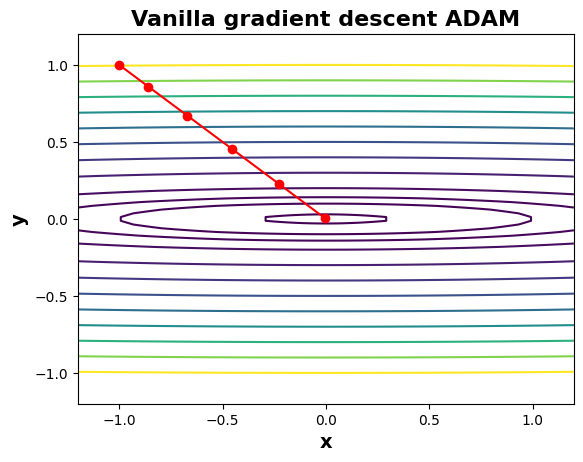

In [ ]:
alpha = 0.1
x0 = np.array([-1, 1])
xs = gd2_adam(x0, grad2, alpha, beta1=0.9, beta2=0.99, max_iter=5)

x = np.linspace(-1.2, 1.2, 100)
y = np.linspace(-1.2, 1.2, 100)
X, Y = np.meshgrid(x, y)
levels=[0.1, 1, 2, 4, 9, 16, 25, 36, 49, 64, 81, 100]
Z = x**2 + 100*Y**2
c = plt.contour(X, Y, Z, levels)
plt.plot(xs[:,0],xs[:,1], 'o-', c='red')
plt.title('Vanilla gradient descent ADAM', fontsize=16, fontweight="bold")
plt.xlabel("x", fontsize=14, fontweight="bold")
plt.ylabel("y", fontsize=14, fontweight="bold")
pass

In [ ]:
beta = 0.2

beta**3 + beta**2*(1-beta) + beta*(1-beta) + (1-beta)

1.0

In [ ]:
beta**2 + beta*(1-beta) + (1-beta)

1.0

## Impacto de un optimizador

La elección de un optimizador u otro puede tener un importante impacto en el resultado, principalmente en los tiempos de entrenamiento. [Acá](https://imgur.com/a/Hqolp#NKsFHJb) se puede ver cómo reaccionan diferentes optimizadores en varias situaciones.

## Acerca de optimizadores

El optimizador Descenso de Gradiente visto no el único utilizado. De hecho, existe toda una familia de optimizadores que, basados en Descenso de Gradiente, intentan mejorar el rendimiento de éste. Entre otros, tenemos:

+ Stochastic Gradient Descent
+ Mini-batch Gradient Descent
+ Momentum
+ AdaGrad
+ RMSProp
+ Adam

### Gradiente descendente estocástico

Un aspecto al que no hemos dado mucha importancia al hablar del algoritmo de Descenso de Gradiente: si la función de error es el error cuadrático medio, ya comentamos que -siguiendo con el ejemplo de la recta de regresión ax + b, podríamos escribir la función de coste de la siguiente manera:

<img src="https://interactivechaos.com/sites/default/files/inline-images/tutorial_ml_loss_function_02.png"/>

Aun cuando calcular las derivadas parciales con respecto a las variables a y b resulte sencillo para un ordenador, en la fórmula anterior estamos involucrando en el cálculo las n muestras de nuestro conjunto de entrenamiento. Es decir, para calcular los incrementos de cada paso en el algoritmo de Descenso de Gradiente habría que hacer pasar todos los datos por el algoritmo, calcular la función de error y las derivadas parciales. Y esto tendría que repetirse, como ya sabemos, hasta que alcanzásemos un mínimo de la función. Y el número de datos (n) puede ser un muy grande, lo que podría suponer una carga demasiado pesada.

El optimizador Stochastic Gradient Descent o Descenso de Gradiente Estocástico simplifica el cálculo considerando solo una muestra escogida de forma aleatoria cada vez que realiza el cálculo del gradiente, es decir, pasamos una única muestra, calculamos la función de error asociada y, a partir de esta, el gradiente y los incrementos a aplicar.

Esto supone que el tiempo necesario para el cálculo es muchísimo menor, aunque el algoritmo irá moviéndose hacia el mínimo de forma menos coherente en cada iteración.

Una ventaja de esta "incoherencia" es que puede resultarle más sencillo escapar de un mínimo local.

### Gradiente descendente estocástico mini-batch

Otra alternativa es la que ofrece la versión "Mini-batch": si hacer pasar todos los datos en cada iteración exige demasiados recursos (aunque devuelva el resultado más exacto de la función de error) y hacer pasar tan solo un dato es la solución más rápida aunque el resultado de la función de error sea solo una aproximación al valor real ¿por qué no plantearse una solución intermedia y calcular el error cada n muestras?

Mini-batch Gradient Descent hace exactamente esto: calcula el gradiente no a partir de todo el conjunto de entrenamiento ni a partir de una única muestra, sino a partir de un pequeño subconjunto aleatorio de muestras llamadas mini-batches. Este algoritmo tarda menos en alcanzar el mínimo que Stochastic Gradient Descent pero corre el riesgo de caer en un mínimo local más fácilmente.

Hay que tener en cuenta, en todo caso, que esta aproximación "mini-batch" suele recibir el nombre de "estocástica" aun cuando involucre más de una muestra por iteración. En otras palabras, cuando leamos el término "Stochastic Gradient Descent" deberemos tener en cuenta que, muy probablemente, se refiera a un algoritmo que calcula la función de error cada $\textit{n}$ muestras, siendo este valor $\textit{n}$ configurable (y pudiendo tomar también el valor 1, por supuesto). El valor n suele denominarse batch size.